In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
try:
    df = pd.read_csv('air_pollution_data.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("Error: 'air_pollution_data.csv' not found. Please ensure it's in the same directory.")
    # Exit or handle the error appropriately if the file is critical
    exit()

# 1. Drop rows where ALL columns are NaN. This handles completely empty lines at the end of the CSV.
original_rows_after_load = df.shape[0]
df.dropna(how='all', inplace=True)
print(f"\nRemoved {original_rows_after_load - df.shape[0]} completely empty rows.")

# 2. Convert 'date' column to datetime objects.
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# 3. Handle any NaT values that resulted from the date conversion.
initial_rows_before_date_drop = df.shape[0]
df.dropna(subset=['date'], inplace=True)
print(f"Removed {initial_rows_before_date_drop - df.shape[0]} rows with unparseable/missing dates.")

# Now, create the 'datetime' column (which will become 'ds' for Prophet).
# Since 'date' is now guaranteed to be clean, this will also be clean.
df['datetime'] = df['date'].dt.strftime('%Y-%m-%d') + ' 00:00:00'
df['datetime'] = pd.to_datetime(df['datetime'])


# 4. Handle invalid values (-24000 with NaN) across numerical columns
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: # Check if the column is numerical
        df[col] = df[col].replace(-24000, np.nan)

# 5. Use the column mean to fill remaining missing values (those from -200 replacement)
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)



print("\n--- Missing values after replacing -24000 with NaN (after dropping empty rows) ---")
print(df.isnull().sum())


# Explore the data: View the first few rows
print("\n--- First 5 rows of the dataset ---")
print(df.head())

# Check for missing values
print("\n--- Missing values per column ---")
print(df.isnull().sum())

# Display data types and statistics
print("\n--- Data types of each column ---")
print(df.info())
print("\n--- Shape of the DataFrame (rows, columns) ---")
print(df.shape) # This will likely show (21005, X) where X is your number of columns

print("\n--- Last 5 rows of the dataset ---")
print(df.tail()) # This will very likely show rows full of NaN values

print("\n--- Descriptive statistics of numerical columns ---")
print(df.describe())

Dataset loaded successfully!

Removed 0 completely empty rows.
Removed 0 rows with unparseable/missing dates.

--- Missing values after replacing -24000 with NaN (after dropping empty rows) ---
city        0
date        0
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
datetime    0
dtype: int64

--- First 5 rows of the dataset ---
        city       date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad 2020-11-30    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad 2020-12-01    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad 2020-12-02    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad 2020-12-03    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad 2020-12-04    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm10    nh3   datetime  
0   72.13   8.36 2020-11-30  
1  154.53  27.36 2020-12-01  
2  172.63  28.12 2020-12-02  

In [20]:

# Based on your CSV, 'aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3' are potential candidates
# We'll replace -240000 with NaN across all numerical columns for safety.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']: # Check if the column is numerical
        df[col] = df[col].replace(-24000, np.nan)

print("\n--- Missing values after replacing 24000 with NaN ---")
print(df.isnull().sum())

# Use the column mean to fill missing values
# For time-series data, more sophisticated imputation methods (like forward fill, backward fill, or interpolation)
# are often preferred. However, adhering to the instruction to use 'column mean' for simplicity.
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        if df[col].isnull().sum() > 0:
            df[col].fillna(df[col].mean(), inplace=True)

print("\n--- Missing values after mean imputation ---")
print(df.isnull().sum())

# First, ensure the 'date' column is in a consistent format (e.g., DD-MM-YYYY or YYYY-MM-DD) for robust parsing.
# The current CSV seems to be DD-MM-YYYY.
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Create a 'datetime' column combining date with a default time
# The requirement is YYYY-MM-DD HH:MM:SS. Since no time is provided, we set it to midnight.
df['datetime'] = df['date'].dt.strftime('%Y-%m-%d') + ' 00:00:00'
df['datetime'] = pd.to_datetime(df['datetime'])

print("\n--- DataFrame after datetime conversion and imputation ---")
print(df.head())
print(df.info())


--- Missing values after replacing 24000 with NaN ---
city        0
date        0
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
datetime    0
dtype: int64

--- Missing values after mean imputation ---
city        0
date        0
aqi         0
co          0
no          0
no2         0
o3          0
so2         0
pm2_5       0
pm10        0
nh3         0
datetime    0
dtype: int64

--- DataFrame after datetime conversion and imputation ---
        city       date  aqi       co     no    no2      o3    so2   pm2_5  \
0  Ahmedabad 2020-11-30    5   520.71   2.38  16.28  130.18  47.68   65.96   
1  Ahmedabad 2020-12-01    5  1682.28   7.71  54.84    0.73  21.70  120.95   
2  Ahmedabad 2020-12-02    5  1815.80  16.54  49.35    0.17  23.84  133.47   
3  Ahmedabad 2020-12-03    5  2296.45  41.57  40.10    0.00  35.76  150.37   
4  Ahmedabad 2020-12-04    5  2189.64  23.92  58.95    0.02  28.13  160.79   

     pm1

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Retain important columns
# As per instructions, focus on pollutant levels and target.
# Since weather conditions are not in the provided CSV, we'll stick to pollutants.
# 'ds' and 'y' columns will be created for Prophet later.
# For now, let's select relevant columns for potential scaling.
relevant_columns = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi']
# Ensure all relevant columns exist after preprocessing, and if not, handle them.
# Drop 'city' for now as it's categorical and not directly used in Prophet (unless handled specially).
# 'date' column is replaced by 'datetime' which will be 'ds'.
df_processed = df[['datetime'] + relevant_columns].copy()

# Identify numerical columns for scaling
numerical_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'] # Excluding aqi for now as it's the target

# Scale the data using StandardScaler
# StandardScaler is a good default as it makes the mean 0 and std 1.
scaler = StandardScaler()
df_processed[numerical_cols] = scaler.fit_transform(df_processed[numerical_cols])

print("\n--- DataFrame after feature engineering (scaling numerical columns) ---")
print(df_processed.head())
print(df_processed.describe())


--- DataFrame after feature engineering (scaling numerical columns) ---
    datetime        co        no       no2        o3       so2     pm2_5  \
0 2020-11-30 -0.422699 -0.147968 -0.339185  2.981724  1.324337 -0.240750   
1 2020-12-01  0.405963  0.069564  1.153150 -1.076132  0.239258  0.164873   
2 2020-12-02  0.501216  0.429939  0.940678 -1.093686  0.328637  0.257224   
3 2020-12-03  0.844112  1.451480  0.582688 -1.099015  0.826487  0.381883   
4 2020-12-04  0.767913  0.731137  1.312214 -1.098388  0.507813  0.458744   

       pm10       nh3  aqi  
0 -0.309913 -0.210906    5  
1  0.203719  0.872062    5  
2  0.316544  0.915380    5  
3  0.500554  1.391886    5  
4  0.523306  1.622729    5  
                            datetime            co            no  \
count                          23504  2.350400e+04  2.350400e+04   
mean   2022-02-25 02:53:37.699115008  4.836914e-17 -9.673829e-18   
min              2020-11-30 00:00:00 -6.703484e-01 -2.451021e-01   
25%              2021-07

In [22]:
from prophet import Prophet
from sklearn.model_selection import train_test_split

# Prepare data for Prophet
prophet_df = df_processed[['datetime', 'aqi']].copy()
prophet_df.rename(columns={'datetime': 'ds', 'aqi': 'y'}, inplace=True)

# IMPORTANT: Ensure the DataFrame is sorted by date, which is crucial for time-series splitting
prophet_df.sort_values(by='ds', inplace=True) # Add this line for robustness

print("\n--- Prophet-ready DataFrame after final NaT/NaN checks ---")
print(prophet_df.isnull().sum())
print("First 5 rows of prophet_df:")
print(prophet_df.head())
print("Last 5 rows of prophet_df:")
print(prophet_df.tail())
print(f"Total rows in prophet_df: {len(prophet_df)}")


# Split the data into training and testing sets
train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size].copy() # Add .copy() to prevent SettingWithCopyWarning
test_df = prophet_df.iloc[train_size:].copy()   # Add .copy()

print(f"\nTraining data shape: {train_df.shape}")
print(f"Testing data shape: {test_df.shape}")

# VERY IMPORTANT DIAGNOSTICS: Check exact date ranges and types
print(f"\nType of 'ds' in train_df: {train_df['ds'].dtype}")
print(f"Train data date range: {train_df['ds'].min()} to {train_df['ds'].max()}")
print(f"Type of 'ds' in test_df: {test_df['ds'].dtype}")
print(f"Test data date range: {test_df['ds'].min()} to {test_df['ds'].max()}")


# Build and train the Prophet model
model = Prophet(
    seasonality_mode='multiplicative',
    daily_seasonality=True,
    weekly_seasonality=True,
    yearly_seasonality=True
)

model.fit(train_df)
print("\nProphet model trained successfully!")


# 1. Creating  a future dataframe that consists ONLY of the dates present in your test_df.
# This ensures a perfect alignment for evaluation.
future_for_evaluation = pd.DataFrame({'ds': test_df['ds']})


print(f"\nType of 'ds' in future_for_evaluation: {future_for_evaluation['ds'].dtype}")
print(f"Future dates generated for evaluation: {future_for_evaluation['ds'].min()} to {future_for_evaluation['ds'].max()}")
print(f"Number of future dates generated for evaluation: {len(future_for_evaluation)}")


# Predict future air quality levels
# The frequency 'D' (daily) is usually inferred correctly by Prophet if input is daily.
# Let's explicitly set freq='D' to be sure, though it shouldn't change default behavior for daily data.
future = model.make_future_dataframe(periods=len(test_df), include_history=False, freq='D')

# Add these print statements to inspect the 'future' date range:
print(f"\nType of 'ds' in future: {future['ds'].dtype}")
print(f"Future dates generated for prediction: {future['ds'].min()} to {future['ds'].max()}")
print(f"Number of future dates generated: {len(future)}")
print(f"Expected number of test dates: {len(test_df)}")

# Verify the dates of the first few future predictions
print("\nFirst 5 future dates:")
print(future.head())
print("\nLast 5 future dates:")
print(future.tail())

# 2. Predict using this new 'future_for_evaluation' dataframe.
forecast_for_evaluation = model.predict(future_for_evaluation)

print("\n--- Forecasted air quality levels for evaluation period (first 5 rows) ---")
print(forecast_for_evaluation[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


forecast = model.predict(future)

print("\n--- Forecasted future air quality levels (first 5 rows) ---")
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())


--- Prophet-ready DataFrame after final NaT/NaN checks ---
ds    0
y     0
dtype: int64
First 5 rows of prophet_df:
              ds  y
0     2020-11-30  5
20792 2020-11-30  5
904   2020-11-30  1
19888 2020-11-30  2
18984 2020-11-30  5
Last 5 rows of prophet_df:
              ds  y
18983 2023-05-25  3
19887 2023-05-25  5
20791 2023-05-25  2
10847 2023-05-25  2
23503 2023-05-25  4
Total rows in prophet_df: 23504

Training data shape: (18803, 2)
Testing data shape: (4701, 2)

Type of 'ds' in train_df: datetime64[ns]
Train data date range: 2020-11-30 00:00:00 to 2022-11-24 00:00:00
Type of 'ds' in test_df: datetime64[ns]
Test data date range: 2022-11-24 00:00:00 to 2023-05-25 00:00:00


17:13:07 - cmdstanpy - INFO - Chain [1] start processing
17:13:08 - cmdstanpy - INFO - Chain [1] done processing



Prophet model trained successfully!

Type of 'ds' in future_for_evaluation: datetime64[ns]
Future dates generated for evaluation: 2022-11-24 00:00:00 to 2023-05-25 00:00:00
Number of future dates generated for evaluation: 4701

Type of 'ds' in future: datetime64[ns]
Future dates generated for prediction: 2022-11-25 00:00:00 to 2035-10-08 00:00:00
Number of future dates generated: 4701
Expected number of test dates: 4701

First 5 future dates:
          ds
0 2022-11-25
1 2022-11-26
2 2022-11-27
3 2022-11-28
4 2022-11-29

Last 5 future dates:
             ds
4696 2035-10-04
4697 2035-10-05
4698 2035-10-06
4699 2035-10-07
4700 2035-10-08

--- Forecasted air quality levels for evaluation period (first 5 rows) ---
          ds      yhat  yhat_lower  yhat_upper
0 2022-11-24  4.687215    3.044120    6.343443
1 2022-11-24  4.687215    3.094178    6.264149
2 2022-11-24  4.687215    3.063396    6.320210
3 2022-11-24  4.687215    3.097252    6.291971
4 2022-11-24  4.687215    3.101517    6.31800


--- Info on results_df after merge ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4680 entries, 0 to 4679
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ds           4680 non-null   datetime64[ns]
 1   y_actual     4680 non-null   int64         
 2   y_predicted  4680 non-null   float64       
 3   yhat_lower   4680 non-null   float64       
 4   yhat_upper   4680 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 182.9 KB
None

--- Head of results_df after merge ---
          ds  y_actual  y_predicted  yhat_lower  yhat_upper
0 2022-11-25         5     4.692923    3.072237    6.306247
1 2022-11-25         5     4.692923    3.072237    6.306247
2 2022-11-25         3     4.692923    3.072237    6.306247
3 2022-11-25         5     4.692923    3.072237    6.306247
4 2022-11-25         4     4.692923    3.072237    6.306247

--- Tail of results_df after merge

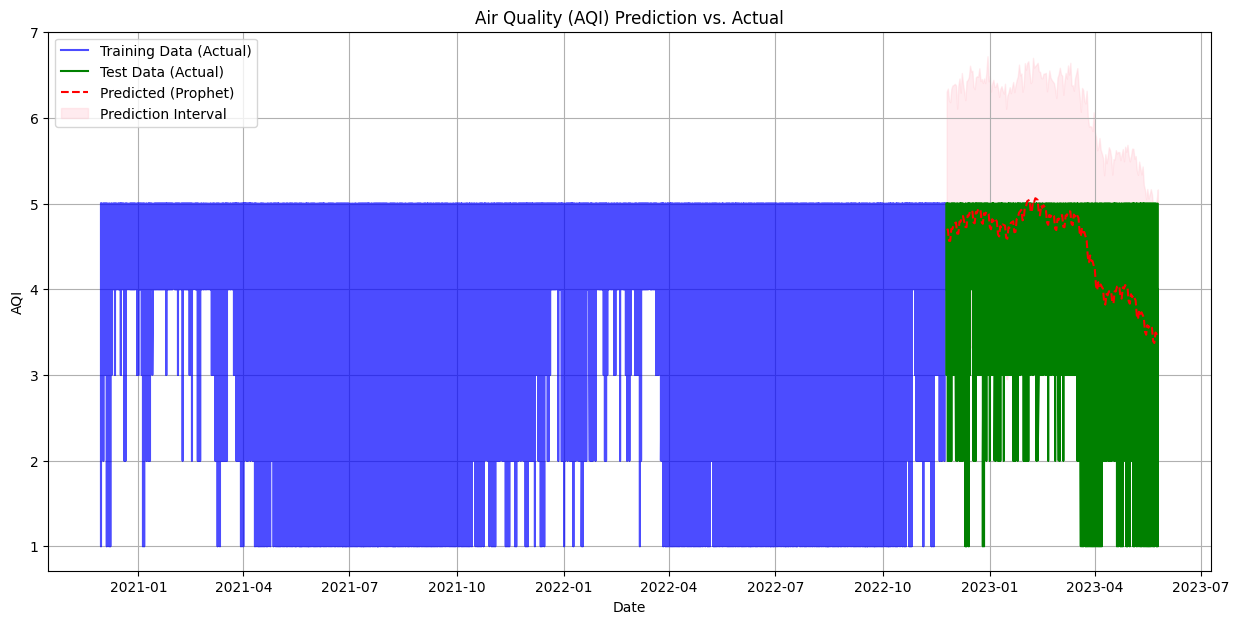

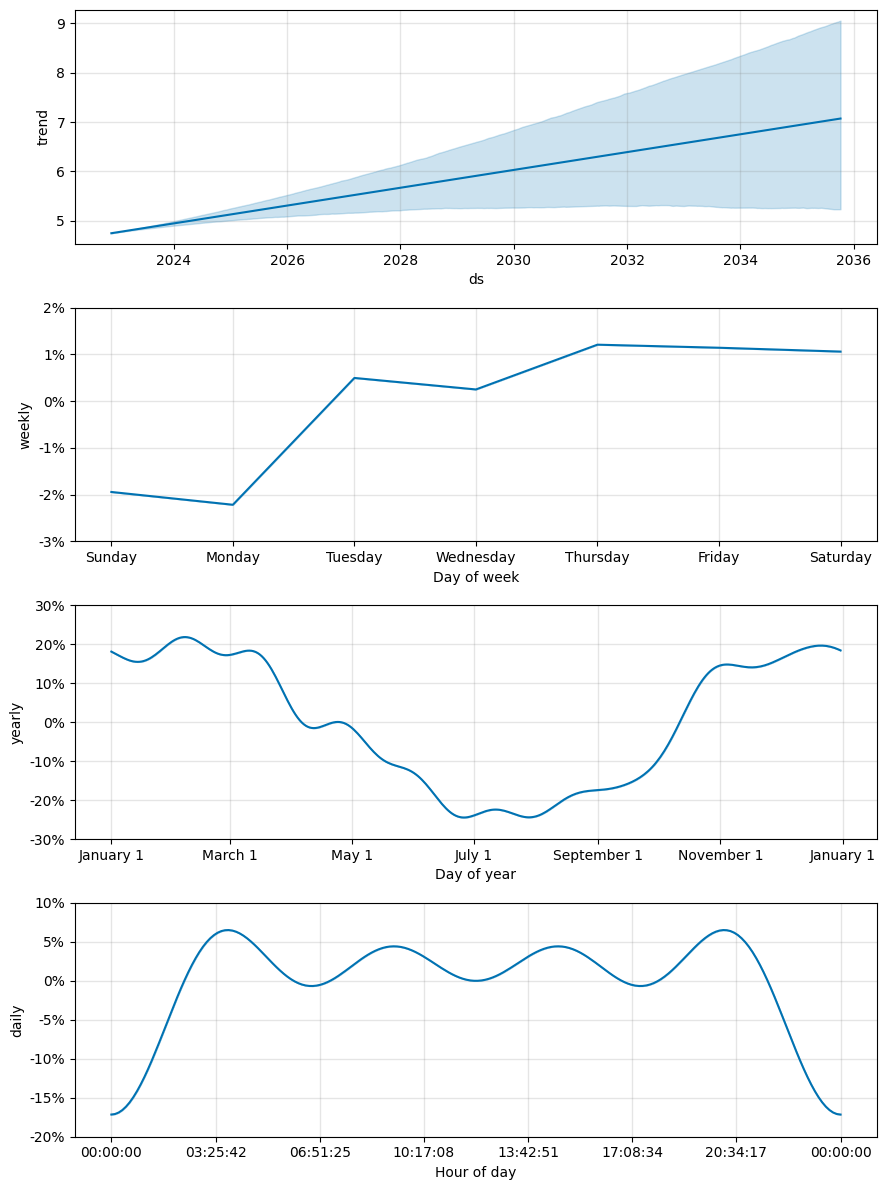

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt # Make sure matplotlib is imported if it's not globally available

# Merge actual values from test_df with forecasted values
# Use pd.merge() for a more explicit and often more reliable join based on the 'ds' column.
# Using 'inner' join ensures that only dates present in *both* test_df and forecast are kept.
results_df = pd.merge(
    test_df,
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], # Select only necessary forecast columns
    on='ds', # Merge on the 'ds' column
    how='inner' # Only keep rows where 'ds' exists in both DataFrames
)

# Rename columns for clarity as before
results_df.rename(columns={'y': 'y_actual', 'yhat': 'y_predicted'}, inplace=True)

# Add a diagnostic print after the merge
print("\n--- Info on results_df after merge ---")
print(results_df.info())
print("\n--- Head of results_df after merge ---")
print(results_df.head())
print("\n--- Tail of results_df after merge ---")
print(results_df.tail())

# Check if results_df is empty before calculating metrics
if results_df.empty:
    print("\nError: The results_df is empty after merging. This means there were no common dates between your test data and the forecast. Check date ranges carefully!")
else:
    # Calculate evaluation metrics
    mae = mean_absolute_error(results_df['y_actual'], results_df['y_predicted'])
    rmse = np.sqrt(mean_squared_error(results_df['y_actual'], results_df['y_predicted']))
    r2 = r2_score(results_df['y_actual'], results_df['y_predicted'])

    print(f"\nMean Absolute Error (MAE): {mae:.3f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")
    print(f"R-squared (R²): {r2:.3f}")

    # Visualize actual vs. predicted pollutant levels
    plt.figure(figsize=(15, 7))
    plt.plot(train_df['ds'], train_df['y'], label='Training Data (Actual)', color='blue', alpha=0.7)
    plt.plot(results_df['ds'], results_df['y_actual'], label='Test Data (Actual)', color='green')
    plt.plot(results_df['ds'], results_df['y_predicted'], label='Predicted (Prophet)', color='red', linestyle='--')
    # Use results_df's own ds, yhat_lower, yhat_upper for plotting prediction interval
    plt.fill_between(results_df['ds'], results_df['yhat_lower'], results_df['yhat_upper'], color='pink', alpha=0.3, label='Prediction Interval')
    plt.title('Air Quality (AQI) Prediction vs. Actual')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.legend()
    plt.grid(True)
    plt.show()

    
    fig = model.plot_components(forecast)
    plt.show()